In [1]:
%matplotlib widget

import platform
import psutil
import time
from pacti.terms.polyhedra import *
import os
import numpy as np
from contract_utils import *
from generators import *

from p_tqdm import p_map, p_umap
from scipy.stats import qmc

import pickle

In [2]:
# lower bounds for design hyperparameters
l_bounds = [
    2.0,  # power: min dns cons
    2.5,  # power: min chrg gen
    0.3,  # power: min sbo cons
    0.2,  # power: min tcm_h cons
    0.1,  # power: min tcm_dv cons
    5.0,  # science: min dsn speed
    2.0,  # science: min sbo gen
    1.0,  # nav: min dsn noise
    1.0,  # nav: min chrg noise
    0.5,  # nav: min sbo imp
    1.2,  # nav: min tcm_dv noise
    0.3,  # nav: min tcm_dv progress
]
# upper bounds for design hyperparameters
u_bounds = [
    2.2,  # power: max dns cons
    3.5,  # power: max chrg gen
    0.4,  # power: max sbo cons
    0.3,  # power: max tcm_h cons
    0.2,  # power: max tcm_dv cons
    6.0,  # science: max dsn speed
    8.0,  # science: max sbo gen
    1.2,  # nav: max dsn noise
    1.2,  # nav: max chrg noise
    0.8,  # nav: max sbo imp
    1.4,  # nav: max tcm_dv noise
    0.5,  # nav: max tcm_dv progress
]

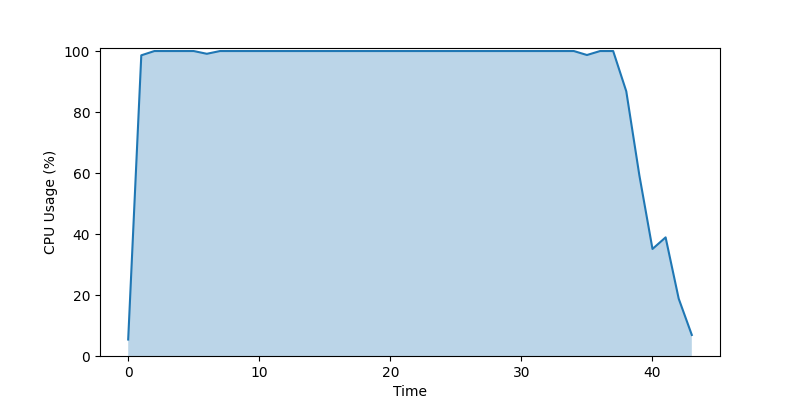

Output()

Generated 200 hyperparameter variations of the 5-step scenario in 16.297937870025635 seconds.
Running on AMD Ryzen Threadripper PRO 3955WX 16-Cores @ 3.8927 GHz with up to 32 threads..
Total count of Pacti operations for each 5-step scenario: 23 contracts, 12 compositions, and 10 merges.


In [3]:
mean_sampler = qmc.LatinHypercube(d=len(l_bounds))
dev_sampler = qmc.LatinHypercube(d=len(l_bounds))

n5 = 200
mean_sample5: np.ndarray = mean_sampler.random(n=n5)
scaled_mean_sample5: np.ndarray = qmc.scale(sample=mean_sample5, l_bounds=l_bounds, u_bounds=u_bounds)
dev_sample5: np.ndarray = dev_sampler.random(n=n5)

nb_5step_operations = OperationCounts(contracts=23, compositions=12, merges=10)

mean_devs = list(zip(scaled_mean_sample5, dev_sample5))

def make_scenario_unpack(args):
    md0, md1 = args
    return make_scenario(1, md0, md1, True)

from cpu_usage_plot import *
with cpu_usage_plot():
    ta = time.time()
    scenarios5: List[Tuple[List[tuple2float], PolyhedralContract]] = p_map(make_scenario_unpack, mean_devs)
    tb = time.time()

print(
    f"Generated {len(mean_devs)} hyperparameter variations of the 5-step scenario in {tb-ta} seconds.\n"
    f"Running on {cpu_info_message}.\n"
    f"Total count of Pacti operations for each 5-step scenario: {nb_5step_operations}."
    )
s = open("scenarios5.data", "wb")
pickle.dump(scenarios5, s)
s.close()